In [146]:
#IMPORT NECESSARY PACKAGES
import gpxpy
import matplotlib.pyplot as plt
import datetime
from math import sqrt, floor
import numpy as np
import pandas as pd
import geopandas
from shapely.geometry import Point,Polygon

In [148]:
#LOAD DATA
gpx_file = open('data/20210519234904-14242-Proposed data.gpx', 'r')
gpx = gpxpy.parse(gpx_file)

In [149]:
#CHECK LENGTH
len(gpx.tracks)
len(gpx.tracks[0].segments)
len(gpx.tracks[0].segments[0].points)

11

In [150]:
#GET GPS TRACKS,SEGMENTS AND POINTS
data = gpx.tracks[0].segments[0].points

In [151]:
## Start Position
start = data[0]
## End Position
finish = data[-1]

In [152]:
#CREATE A PANDAS DATAFRAME
df = pd.DataFrame(columns=['lon', 'lat', 'ele'])
for point in data:
    df = df.append({'lon': point.longitude, 'lat' : point.latitude, 'ele' : point.elevation}, ignore_index=True)

In [153]:
#READ
df

,lon,lat,ele
0,35.336337,-0.797124,1904.768
1,35.337059,-0.796586,1907.660
2,35.337534,-0.797069,1902.705
3,35.337815,-0.797283,1902.272
4,35.337488,-0.797555,1898.250
5,35.337302,-0.797652,1899.192
6,35.337108,-0.797710,1899.809
7,35.336862,-0.797812,1900.181
8,35.336772,-0.797742,1900.589
9,35.336498,-0.797420,1903.174


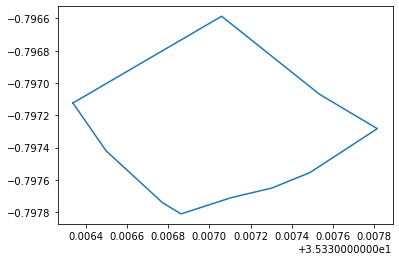

In [154]:
#PLOT
plt.plot(df['lon'], df['lat'])

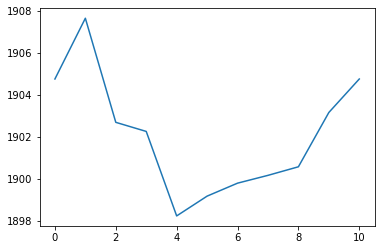

In [155]:
#PLOT ELEVATION
plt.plot(df['ele'])

In [156]:
#CREATE A GEODATAFRAME
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.lon, df.lat,df.ele))

In [157]:
print(gdf.head())

         lon       lat       ele                                geometry
0  35.336337 -0.797124  1904.768  POINT Z (35.33634 -0.79712 1904.76800)
1  35.337059 -0.796586  1907.660  POINT Z (35.33706 -0.79659 1907.66000)
2  35.337534 -0.797069  1902.705  POINT Z (35.33753 -0.79707 1902.70500)
3  35.337815 -0.797283  1902.272  POINT Z (35.33782 -0.79728 1902.27200)
4  35.337488 -0.797555  1898.250  POINT Z (35.33749 -0.79756 1898.25000)


In [158]:
#PROJECT
gdf.crs={'init': 'epsg:4326'} 

C:\Users\USER\miniconda3\envs\gee\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [159]:
gdf.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [160]:
#PROJECT TO ZONE 36S
geo_df = gdf.to_crs({'init': 'epsg:32736'})

In [161]:
geo_df.crs

<Projected CRS: EPSG:32736>
Name: WGS 84 / UTM zone 36S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, southern hemisphere between 80°S and equator, onshore and offshore. Burundi. Eswatini (Swaziland). Kenya. Malawi. Mozambique. Rwanda. South Africa. Tanzania. Uganda. Zambia. Zimbabwe.
- bounds: (30.0, -80.0, 36.0, 0.0)
Coordinate Operation:
- name: UTM zone 36S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [162]:
geo_df.shape

(11, 4)

In [164]:
geo_df

,lon,lat,ele,geometry
0,35.336337,-0.797124,1904.768,POINT Z (760023.320 9911820.022 1904.768)
1,35.337059,-0.796586,1907.660,POINT Z (760103.804 9911879.460 1907.660)
2,35.337534,-0.797069,1902.705,POINT Z (760156.626 9911826.016 1902.705)
3,35.337815,-0.797283,1902.272,POINT Z (760187.977 9911802.326 1902.272)
4,35.337488,-0.797555,1898.250,POINT Z (760151.503 9911772.200 1898.250)
5,35.337302,-0.797652,1899.192,POINT Z (760130.825 9911761.590 1899.192)
6,35.337108,-0.797710,1899.809,POINT Z (760109.130 9911755.128 1899.809)
7,35.336862,-0.797812,1900.181,POINT Z (760081.730 9911743.914 1900.181)
8,35.336772,-0.797742,1900.589,POINT Z (760071.755 9911751.608 1900.589)
9,35.336498,-0.797420,1903.174,POINT Z (760041.225 9911787.235 1903.174)


In [165]:
geo_df.crs

<Projected CRS: EPSG:32736>
Name: WGS 84 / UTM zone 36S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, southern hemisphere between 80°S and equator, onshore and offshore. Burundi. Eswatini (Swaziland). Kenya. Malawi. Mozambique. Rwanda. South Africa. Tanzania. Uganda. Zambia. Zimbabwe.
- bounds: (30.0, -80.0, 36.0, 0.0)
Coordinate Operation:
- name: UTM zone 36S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [169]:
geo_df

,lon,lat,ele,geometry
0,35.336337,-0.797124,1904.768,POINT Z (760023.320 9911820.022 1904.768)
1,35.337059,-0.796586,1907.660,POINT Z (760103.804 9911879.460 1907.660)
2,35.337534,-0.797069,1902.705,POINT Z (760156.626 9911826.016 1902.705)
3,35.337815,-0.797283,1902.272,POINT Z (760187.977 9911802.326 1902.272)
4,35.337488,-0.797555,1898.250,POINT Z (760151.503 9911772.200 1898.250)
5,35.337302,-0.797652,1899.192,POINT Z (760130.825 9911761.590 1899.192)
6,35.337108,-0.797710,1899.809,POINT Z (760109.130 9911755.128 1899.809)
7,35.336862,-0.797812,1900.181,POINT Z (760081.730 9911743.914 1900.181)
8,35.336772,-0.797742,1900.589,POINT Z (760071.755 9911751.608 1900.589)
9,35.336498,-0.797420,1903.174,POINT Z (760041.225 9911787.235 1903.174)


In [170]:
#get projected values from geometry
geo_df['x'] = None
geo_df['y'] = None
geo_df['e'] = None


geo_df['x'] = geo_df.geometry.apply(lambda x: x.x)
geo_df['y'] = geo_df.geometry.apply(lambda x: x.y)
geo_df['e'] = geo_df.geometry.apply(lambda x: x.z)

In [171]:
coordinate_list = [(x,y,e) for x,y,e in zip(geo_df.x , geo_df.y,geo_df.e)]

In [173]:
coordinate_list

[(760023.3204170881, 9911820.02197887, 1904.768),
 (760103.8037010281, 9911879.460099561, 1907.66),
 (760156.6257695933, 9911826.016064063, 1902.705),
 (760187.9773967445, 9911802.326053752, 1902.272),
 (760151.5033769442, 9911772.200143933, 1898.25),
 (760130.8249364771, 9911761.589770054, 1899.192),
 (760109.1303804357, 9911755.12767041, 1899.809),
 (760081.7303998696, 9911743.914131414, 1900.181),
 (760071.7550257633, 9911751.608199755, 1900.589),
 (760041.2247859068, 9911787.23492929, 1903.174),
 (760023.3204170881, 9911820.02197887, 1904.768)]

In [174]:
#create list
rows=[['760023.3204170881', '9911820.02197887', '1904.768'],
      ['760103.8037010281', '9911879.460099561', '1907.66'],
 ['760156.6257695933', '9911826.016064063', '1902.705'],
 ['760187.9773967445', '9911802.326053752', '1902.272'],
 ['760151.5033769442', '9911772.200143933', '1898.25'],
 ['760130.8249364771', '9911761.589770054', '1899.192'],
 ['760109.1303804357', '9911755.12767041', '1899.809'],
 ['760081.7303998696','9911743.914131414', '1900.181'],
 ['760071.7550257633', '9911751.608199755', '1900.589'],
 ['760041.2247859068', '9911787.23492929', '1903.174'],
 ['760023.3204170881', '9911820.02197887', '1904.768']]

In [175]:
#convert list to df
my_df = pd.DataFrame(rows)
my_df 

,0,1,2
0,760023.3204170881,9911820.02197887,1904.768
1,760103.8037010281,9911879.460099561,1907.66
2,760156.6257695933,9911826.016064063,1902.705
3,760187.9773967445,9911802.326053752,1902.272
4,760151.5033769442,9911772.200143933,1898.25
5,760130.8249364771,9911761.589770054,1899.192
6,760109.1303804357,9911755.12767041,1899.809
7,760081.7303998696,9911743.914131414,1900.181
8,760071.7550257633,9911751.608199755,1900.589
9,760041.2247859068,9911787.23492929,1903.174


In [142]:
#export
my_df.to_csv('my_csv.csv', index=False, header=False)